In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compressed Dataset
from zipfile import ZipFile
zipdata = '/content/creditcardfraud.zip'
with ZipFile(zipdata, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


###Initial things

In [ ]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import svm
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


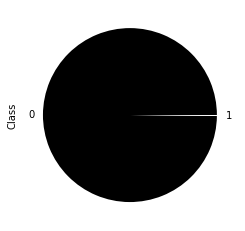

In [ ]:
# showing that this dataset is totally unbalanced
count_classes = pd.value_counts(dataset['Class'])
count_classes.plot.pie(colors = ['black', 'white'])

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

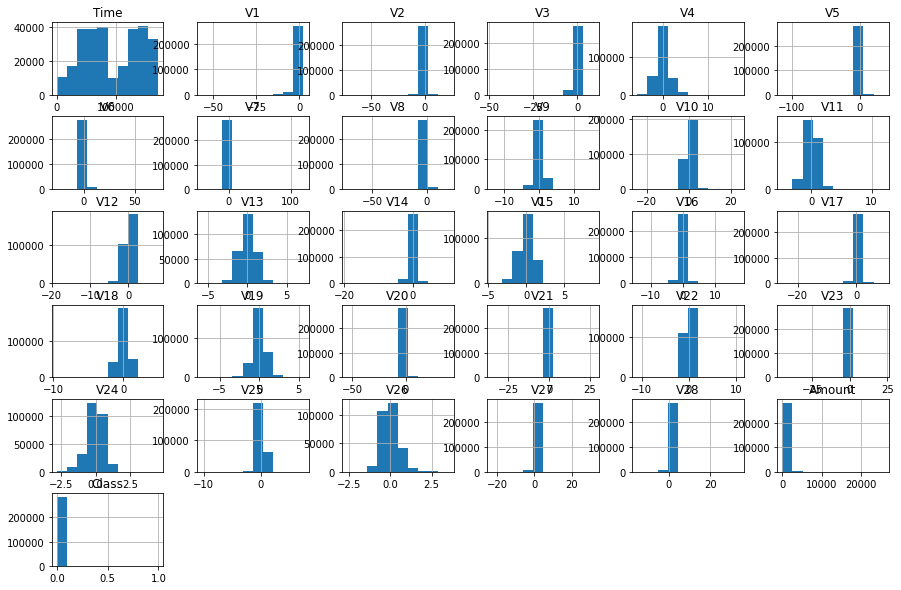

In [ ]:
dataset.hist(figsize=(15, 10));

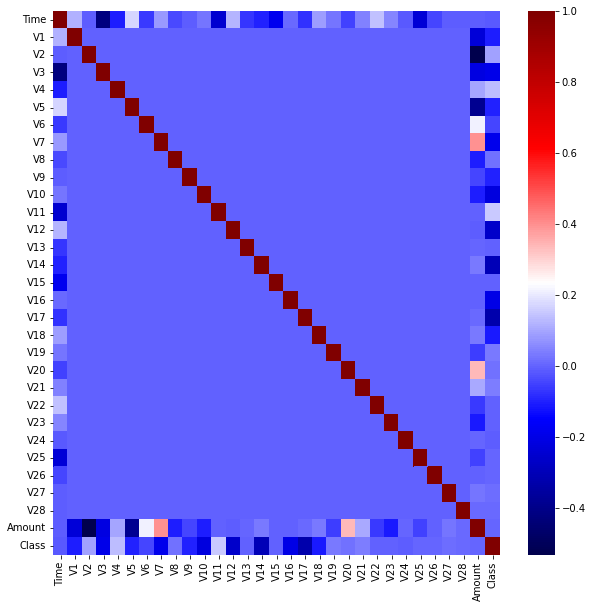

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show();

In [ ]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [ ]:
scores = []

In [ ]:
#  "Support Vector Machine",
#names = ["Logistic Regression", "Random Forest", "XGBoost", "Ada Boost", "Stochastic Gradient Descent", "Neural Network Models (supervised)", 
#         "Decision Trees", "Gaussian Naive Bayes", "Gradient Boosting", "K-Nearest Neighbors", "Voting Classifier"]

names = ["XGBoost", "DT", "SGD", "VC"]


In [ ]:
preci = []
recall = []
f1 = []

###Extreme Gradient Boosting (XGBoost)

In [ ]:
from imblearn.combine import SMOTETomek 
X = np.asarray(dataset.drop('Class', axis=1))
y = np.asarray(dataset['Class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=30)
X_train.shape

(227845, 30)

In [ ]:
smetk = SMOTETomek(random_state=30)
X_train, y_train = smetk.fit_resample(X_train, y_train)
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 226844, 1: 226844})


In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
xgb_clf = XGBClassifier(n_estimators=300, use_label_encoder=False)
#import time
#start_time = time.clock()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')
#print(time.clock() - start_time, "seconds")


y_test_pred = xgb_clf.predict(X_test)

In [ ]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9984024437344194


In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[56792    72]
 [   19    79]]


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

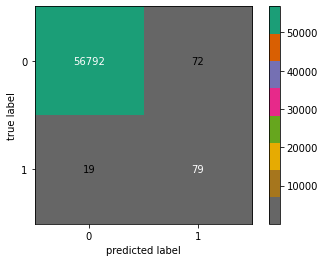

In [ ]:
xgb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=xgb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.81      0.63        98

    accuracy                           1.00     56962
   macro avg       0.76      0.90      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_split= 3, min_samples_leaf = 1, random_state=30)
#import time
#start_time = time.clock()
dt_clf = dt_clf.fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

In [ ]:
y_test_pred = dt_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9938204416979741


In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[56529   335]
 [   17    81]]


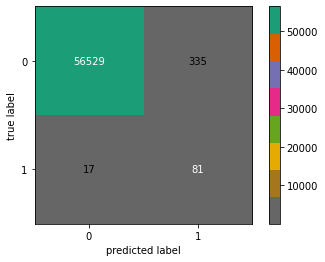

In [ ]:
dt_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=dt_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.83      0.32        98

    accuracy                           0.99     56962
   macro avg       0.60      0.91      0.66     56962
weighted avg       1.00      0.99      1.00     56962



In [ ]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Stochastic gradient descent

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
import time
#start_time = time.clock()
sgd_clf = SGDClassifier(loss="log", penalty="l2", max_iter=3000000).fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

In [ ]:
y_test_pred = sgd_clf.predict(X_test)

In [ ]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9930128857835048


In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[56481   383]
 [   15    83]]


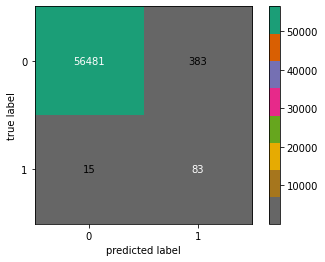

In [ ]:
sgd_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=sgd_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.85      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.92      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [ ]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

labels = ["XGBoost", "Decision Tree", "Stochastic Gradient Descent"]
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier (estimators = [('XGBoost', xgb_clf), ('DT', dt_clf), ('SGD', sgd_clf)],
voting='soft')
#import time
#start_time = time.clock()
voting_clf.fit(X_train,y_train)
#print(time.clock() - start_time, "seconds")

y_test_pred = voting_clf.predict(X_test)

In [ ]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9961904427513079


In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[56663   201]
 [   16    82]]


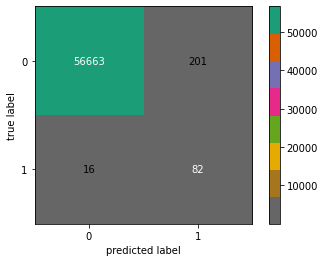

In [ ]:
voting_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=voting_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.84      0.43        98

    accuracy                           1.00     56962
   macro avg       0.64      0.92      0.71     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

In [ ]:
scores = [round(x*100, 2)  for x in scores]
preci = [round(x*100, 2)  for x in preci]
recall = [round(x*100, 2)  for x in recall]
f1 = [round(x*100, 2)  for x in f1]

In [ ]:
df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
cm = sns.light_palette("purple", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Classifier Name,Accuracy Score
0,XGBoost,99.840000
1,DT,99.380000
2,SGD,99.300000
3,VC,99.620000


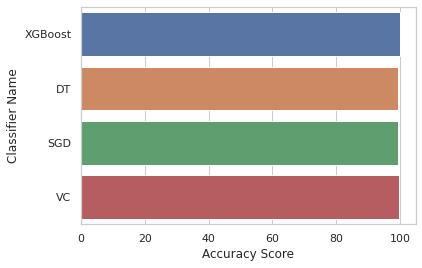

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data = df)

In [ ]:
import pandas as pd
from zipfile import ZipFile as zip
res_df = pd.DataFrame(np.column_stack([names, scores, preci, recall, f1]), columns =['Classifier', 'Accuracy Score', 'Precision', 'Recall', 'F1-score'])

In [ ]:
res_df

,Classifier,Accuracy Score,Precision,Recall,F1-score
0,XGBoost,99.84,76.14,90.24,81.69
1,DT,99.38,59.72,91.03,65.6
2,SGD,99.3,58.89,92.01,64.54
3,VC,99.62,64.47,91.66,71.43


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.pyplot import figure
voting_probs = voting_clf.predict_proba(X_test)
voting_probs = voting_probs[:, 1]
voting_auc = roc_auc_score(y_test, voting_probs)
voting_auc

0.968366880376236